# Chapter 2: Multivariables Optimization
This notebook serves as a way to familiarize myself with the essential functions employed during math modeling.
This is for Chapter 2 of Meerschaert

In [53]:
import math
import numpy as np
from scipy.optimize import minimize
from sympy import symbols, diff, Eq, solve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2.1 Optimization without constraints
## Example 2.1 The color TV sets problem
A manufacturer of color TV sets is planning the introduction of two new products, a 19–inch LCD flat panel set with a manufacturer’s suggested retail price (MSRP) of 339  dollars and a 21–inch LCD flat panel set with an MSRP of 399 dollars. The cost to the company is 195 dollars per 19–inch set and 225 dollars per 21–inch set, plus an additional 400,000 dollar in fixed costs. In the competitive market in which these sets will be sold, the number of sales per year will affect the average selling price. It is estimated that for each type of set, the average selling price drops by one cent for each additional unit sold. Furthermore, sales of the 19– inch set will affect sales of the 21–inch set, and vice–versa. It is estimated that the average selling price for the 19–inch set will be reduced by an additional 0.3 cents for each 21–inch set sold, and the price for the 21–inch set will decrease by 0.4 cents for each 19–inch set sold. How many units of each type of set should be manufactured?


In this problem, we will approach using the multivariable optimization problem without constraints method. Recall from Calc 3, and the following parts will also use Calc 3 knowledge.

We are given a function $y = f(x_1, ..., x_n)$ on a subset $S$ of the $n$–dimensional space $\mathbb{R}^n$. We wish to find the maximum and/or minimum values of $f$ on the set $S$. There is a theorem that states that if $f$ attains its maximum or minimum at an interior point $(x_1, . . . , x_n)$ in $S$, then $\nabla f = 0$ at that point, assuming that $f$ is differentiable at that point. In other words, at the extreme point
$$\frac{∂f}{∂x_1} (x_1, ..., x_n) = 0 $$
$$\frac{∂f}{\delta x_n} (x_1,...,x_n)=0$$
The theorem allows us to rule out as a candidate for max–min any point in the interior of $S$ for which any of the partial derivatives of $f$ do not equal zero. Thus, to find the max–min points we must solve simultaneously the n equations in n unknowns defined by Equation above. Then we must also check any points on the boundary of $S$, as well as any points where one or more of the partial derivatives is undefined.

Now we declare the variables used for modeling:

#### Variables:
s = number of 19–inch sets sold (per year) 

t = number of 21–inch sets sold (per year) 

p = selling price for a 19–inch set ($)

q = selling price for a 21–inch set ($)

C = cost of manufacturing sets ($/year) 

R = revenue from the sale of sets ($/year) 

P = profit from the sale of sets ($/year)

#### Assumptions:
p = 339 − 0.01s − 0.003t

q = 399 − 0.004s − 0.01t

R = ps + qt

C =400,000+195s+225t P=R−C

s≥0 t≥0

#### Objective:
Maximize P

In [54]:
# variable declaration
s, t, p, q = symbols('s t p q')
p = 339 - 0.01 * s - 0.003 * t
q = 399 - 0.004 * s - 0.01 * t
R = p * s + q * t
C = 400000 + 195 * s + 225 * t
P = R - C
print("P = ", P)

P =  s*(-0.01*s - 0.003*t + 339) - 195*s + t*(-0.004*s - 0.01*t + 399) - 225*t - 400000


We let $y = P$ to be the goal variable of finding the maximum, $x_1 =s,x_2=t$ to be the deciding variables, the problem now becomes finding the maximum of $y = f(x_1,x_2) = x_1(-0.01x_1 - 0.003x_2 + 339)  + x_2(-0.004x_1 - 0.01x_2 + 399) - (195x_1 + 225x_2 + 400000)$ on the support $S = \{(x_1,x_2):\:x_1 \geq 0, x_2 \geq 0\}$. Figure 2.1 suggests that $f$ achieves maximum inside $S$, and Figure 2.2, the contour plot telss us that $f$ is a parabaloid with maximum at the only solutions letting $\nabla f = 0$. We can see from figure 2.2 that the maximum of $f$ is near $x_1= 5000, x_2 = 7000$.   

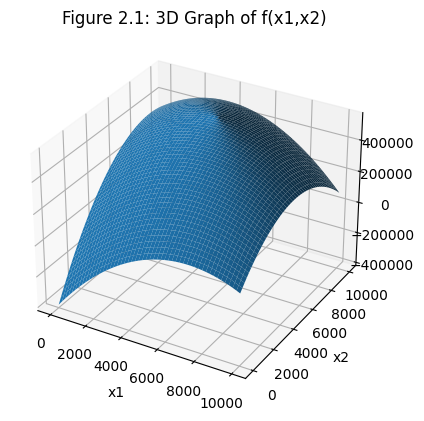

In [55]:
# multivariable function
def function(x1, x2):
    return x1 * (-0.01 * x1 - 0.003 * x2 + 339)  + x2 * (-0.004 * x1 - 0.01 * x2 + 399) - (195 * x1 + 225 * x2 + 400000)
x1_val = np.linspace(0, 10000, 1000)
x2_val = np.linspace(0, 10000, 1000)

# create a meshgrid
X1, X2 = np.meshgrid(x1_val, x2_val)

Y = function(X1, X2)

# plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y)

# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Figure 2.1: 3D Graph of f(x1,x2)')
# ax.text(0, 0, 0, "Figure 2.1", ha='center', va='center', color='black', fontsize=10)

plt.show()


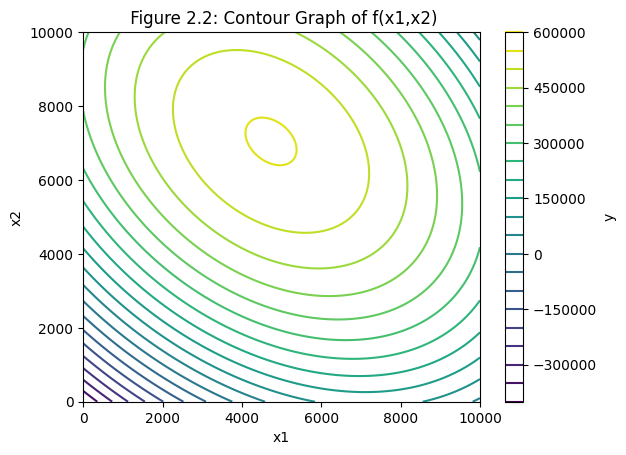

In [56]:
# plot the contour graph of f(x1, x2), note that necessary variables are defined above
# Plot the contour graph
plt.contour(X1, X2, Y, levels=20, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(' Figure 2.2: Contour Graph of f(x1,x2)')
plt.colorbar(label='y')

# Show the plot
plt.show()


Now we solve the system of linear equations. At these points, we have 
$$\frac{\partial f}{ \partial x_1} = \frac{\partial f}{ \partial x_2} = 0$$

In [57]:
# solve the equations
# define variables
x1,x2 = symbols('x1 x2')

y = x1 * (-0.01 * x1 - 0.003 * x2 + 339)  + x2 * (-0.004 * x1 - 0.01 * x2 + 399) - (195 * x1 + 225 * x2 + 400000)
dy_dx1 = diff(y, x1)
dy_dx2 = diff(y, x2)

eq1 = dy_dx1
eq2 = dy_dx2

sol = solve((eq1,eq2), (x1,x2))
x1_sol = round(float(sol[x1]))
x2_sol = round(float(sol[x2]))
print("x1: ", x1_sol)
print("x2: ", x2_sol)
print("profit: ", round(float(y.subs([(x1, x1_sol), (x2, x2_sol)]))))

x1:  4735
x2:  7043
profit:  553641


Now we can answer the question. We say that this company can gain maximum profit by producing 4735 19–inch LCD flat panel sets and 7043 21–inch LCD flat panel sets. Annual net profit is 553 641 dollars. Total cost is 2 908 000 dollars, and the profit rate is $19\%$, which suggests that it is profitable, so the plan should be promoted.

To show robustness of the result, a sensitivity analysis should be included. Consider the elasticity coefficient of price $a$, we assume that $a = 0.01 \$/set$.
$$y = f(x_1,x_2) = ((339 - ax_1) - 0.003 x_2 ) x_1 + (399 - 0.004 x_1 - 0.01 x_2) x_2 - (400000 + 195x_1 + 225 x_2)$$
Find the partial derivative and set it to zero gives:
$$ \frac{\partial f}{\partial x_1} = 144 - 2ax_1 - 0.007x_2 = 0$$
$$ \frac{\partial f}{\partial x_2} = 174 - 0.007 x_1 - 0.02 x_2 = 0$$
hence gives
$$x_1 = \frac{1662000}{40000a - 49}$$
$$x_2 = 8700 - \frac{581700}{40000a - 49}$$
Figure 2.3, 2.4 gives the curve graph of $x_1,x_2$ with respect to $a$.

/var/folders/5k/dxr734d9689bc89yzzy47lmc0000gp/T/ipykernel_2141/3085113135.py:11: RuntimeWarning: divide by zero encountered in divide
  x1_values = (144 - 0.007 * x2_value) / (2 * a_values)


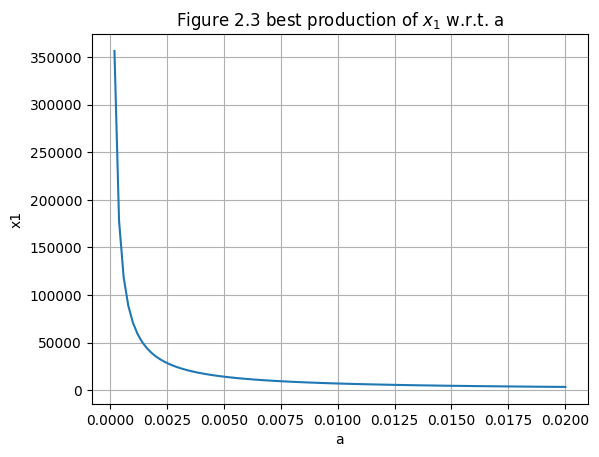

In [58]:
def partial_x1(a, x1, x2):
    return 144 - 2 * a * x1 - 0.007 * x2

# Generate values for a (with the specified restriction)
a_values = np.linspace(0, 0.02, 100)

# Choose a specific value for x2
x2_value = 0

# Calculate corresponding values for x1 using the equation
x1_values = (144 - 0.007 * x2_value) / (2 * a_values)
# x1_values = np.clip(x1_values, 0, 10000)

# Plot the graph
plt.plot(a_values, x1_values)
plt.xlabel('a')
plt.ylabel('x1')
plt.title(r'Figure 2.3 best production of $x_1$ w.r.t. a')
plt.grid(True)
plt.show()

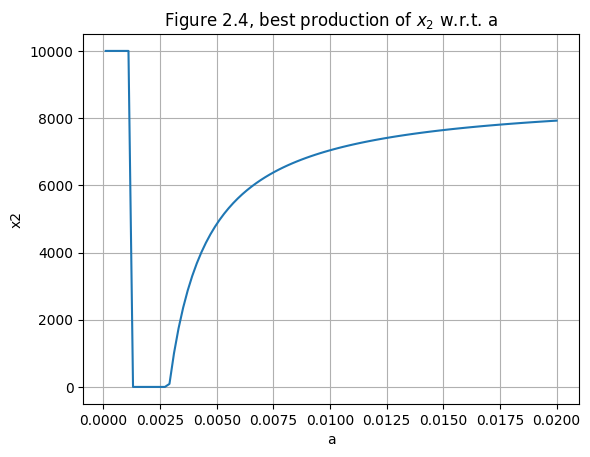

In [59]:
# Define the expressions for x1 and x2 in terms of a
def calculate_x1(a):
    return 1662000 / (40000 * a - 49)

def calculate_x2(a):
    return np.clip(8700 - 581700 / (40000 * a - 49), 0, 10000)

# Generate values for a
a_values = np.linspace(0.0001, 0.02, 100)  # Avoid division by zero by starting from a small value

# Calculate corresponding values for x2 using the expressions
x2_values = calculate_x2(a_values)

# Plot the graph
plt.plot(a_values, x2_values)
plt.xlabel('a')
plt.ylabel('x2')
plt.title(r'Figure 2.4, best production of $x_2$ w.r.t. a')
plt.grid(True)
plt.show()

At $a = 0.01$, $$\frac{dx_1}{da} = - \frac{66\:480\:000\:000}{(40\:000a-49)^2} = \frac{-22\:160\:000\:000}{41607}$$, so 
$$S(x_1,a) = \bigg(\frac{-22\:160\:000\:000}{41607}\bigg)\bigg(\frac{0.01}{554\:000/117}\bigg) = -\frac{400}{351} \approx -1.1$$
Similarly, 
$$S(x_2,a) = \frac{9695}{36153} \approx 0.27$$


The sensitivity of $y$ with respect to $a$ is left.

## 2.2 Lagrange Multiplier
Sometimes there are restraints for the variables, so the idea of lagrange multiplier is introduced to help constructing the model. Consider the revised TV set Problem:
## Example 2.2 TV with constraints
We reconsider the color TV problem (Example 2.1) introduced in the previous section. There we assumed that the company has the potential to produce any number of TV sets per year. Now we will introduce constraints based on the available production capacity. Consideration of these two new products came about because the company plans to discontinue manufacture of some older models, thus providing excess capacity at its assembly plant. This excess capacity could be used to increase production of other existing product lines, but the company feels that the new products will be more profitable. It is estimated that the available production capacity will be sufficient to produce 10,000 sets per year (≈ 200 per week). The company has an ample supply of 19–inch and 21–inch LCD panels and other standard components; however, the circuit boards necessary for constructing the sets are currently in short supply. Also, the 19–inch TV requires a different board than the 21–inch model because of the internal configuration, which cannot be changed without a major redesign, which the company is not prepared to undertake at this time. The supplier is able to supply 8,000 boards per year for the 21–inch model and 5,000 boards per year for the 19–inch model. Taking this information into account, how should the company set production levels?

Again, we first declare the variables:
#### Variables
s = number of 19–inch sets sold (per year) 

t = number of 21–inch sets sold (per year) 

p = selling price for a 19–inch set ($)

q = selling price for a 21–inch set ($)

C = cost of manufacturing sets ($/year) 

R = revenue from the sale of sets ($/year) 

P = profit from the sale of sets ($/year)

#### Assumptions
p = 339 − 0.01s − 0.003t

q = 399 − 0.004s − 0.01t

R = ps + qt

C =400,000+195s+225t 

P=R−C

s ≤ 5000

t ≤ 8000
s + t ≤ 10, 000 s≥0

t≥0

#### Objective
Maximize P

### Lagrange Multiplier
Recall from Calculus III.

Given function $y = f(x_1,...,x_n)$ with a couple constraints. Suppose these constrainst can be expressed by $k$ equations.
$$ g_1(x_1,...,x_n) = c_1 $$
$$\vdots$$
$$ g_k(x_1,...,x_n) = c_k $$
We want to find the maximum of $y = f(x_1,...,x_n)$ in the set $S = \{(x_1,...,x_n):g_i(x_1,...,x_n) = c_i, i = 1,2,...,k\}$
Assume $\nabla g_1,...,\nabla g_k$ is a sequence of linearly independent vectors, then at the maximum/minimum $x \in S$, there must be $\nabla f = \lambda_1 \nabla g_1 + \cdots + \lambda_k \nabla g_k$. The $lambda$s are called the lagrange multipliers.

i.e., given $f$ and $g$, we find $\nabla f$ and $\nabla g$. Then at the extrema, we have $\nabla f = \lambda \nabla g$. If there's more than one constraints, we introduce $\lambda_2$...etc.

Moving back to the problem, we want to find the maximum of the function $y=P$ (profit) with the decision variables $x_1 = s$, $x_2 = t$. Again,
$y = f(x_1,x_2) = (339 - 0.01x_1 - 0.03x_2) x1 + (399 - 0.004 x_1 - 0.01 x_1) x2 - (400000 + 195 x_1 + 225 x_2)
Except that we need to find the maximum under these constraints:
$$ \begin{align*}
& x_1 \leq 5000\\
& x_2 \leq 8000\\
& x_1 + x_2 \leq 10000\\
& x_1 \geq 0\\
& x_2 \geq 0
\end{align*}$$
and this set $S$ is called the *feasible region*.


In [60]:
# variable declaration
x1, x2, lambda_, c = symbols('x1 x2 lambda c', real=True)

# declare the multivariable function
y = (339 - x1/100 - 3 * x2 / 1000) * x1 + (399 - 4 * x1 / 1000 - x2 / 100) * x2 - (400000 + 195 * x1 + 225 * x2)

# calculating the partial derivatives
dy_dx1 = diff(y, x1)
dy_dx2 = diff(y, x2)

print("dy_dx1: ", dy_dx1)
print("dy_dx2: ", dy_dx2)

# solve dy_dx1 = lambda, dy_dx2 = lambda, x1+x2 = c, x1,x2,x3
eq1 = Eq(dy_dx1, lambda_)
eq2 = Eq(dy_dx2, lambda_)
eq3 = Eq(x1 + x2, c)

# Solve the system of equations
solution = solve((eq1, eq2, eq3), (x1, x2, lambda_))
sol_x1 = solution[x1]
sol_x2 = solution[x2]
sol_lambda = solution[lambda_]

# Print the solution
print(solution)

y_with_sol = y.subs({x1: sol_x1, x2: sol_x2, lambda_: sol_lambda})

dy_with_sol_dc = diff(y_with_sol, c)
print("y: ", y_with_sol)
# c = 10000
print("dy_dc: ", dy_with_sol_dc)
print("dy_dc: ", dy_with_sol_dc.subs({c: 10000}))

# Substitute the solutions into dy_with_sol_dc and y
dy_dc_value = dy_with_sol_dc.subs({x1: sol_x1, x2: sol_x2, lambda_: sol_lambda})
y_value = y_with_sol.subs({x1: sol_x1, x2: sol_x2, lambda_: sol_lambda})

# Substitute c=10000 into the expression
result = dy_dc_value * (10000) / y_value

# Print the result
print("Result when c=10000:", result.subs({c:10000}))


dy_dx1:  -x1/50 - 7*x2/1000 + 144
dy_dx2:  -7*x1/1000 - x2/50 + 174
{lambda: 159 - 27*c/2000, x1: c/2 - 15000/13, x2: c/2 + 15000/13}
y:  -210*c + (4512/13 - 13*c/2000)*(c/2 - 15000/13) + (5097/13 - 7*c/1000)*(c/2 + 15000/13) - 5650000/13
dy_dc:  159 - 27*c/2000
dy_dc:  24
Result when c=10000: 78/173
